# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Kayla Breum
#### [Click Here for My Github Repo](https://github.com/kcbreum/web-scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [125]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from spacy.lang.en.stop_words import STOP_WORDS

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.4
contourpy                 1.2.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm            3.7.1
executing       

## Question 1
1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [126]:
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

response = requests.get(url)

if response.status_code == 200:
    # Extract the HTML content from the response
    html_content = response.text
    with open("article_html.pkl", "wb") as f:
        pickle.dump(html_content, f)
        print("Article HTML dumped to article_html.pkl")
else:
    print(f"Error: Failed to fetch HTML content. Status code: {response.status_code}")

Article HTML dumped to article_html.pkl


## Question 2
2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [127]:
with open("article_html.pkl", "rb") as file:
    article_html = pickle.load(file)

soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()

print(text)

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

## Question 3
3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [128]:
with open("article_html.pkl", "rb") as f:
    html_content = pickle.load(f)

article_text = "Extracted article text goes here..."

nlp = spacy.load("en_core_web_sm")

doc = nlp(article_text)

filtered_tokens = [
    token.text.lower()
    for token in doc
    if token.is_alpha and not token.is_stop and not token.is_space
]

token_counts = Counter(filtered_tokens)

most_common_tokens = token_counts.most_common(5)

print("5 Most Frequent Tokens (lowercase):")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")

print("\nAll Tokens and Their Frequencies (lowercase):")
for token, frequency in token_counts.items():
    print(f"{token}: {frequency}")


5 Most Frequent Tokens (lowercase):
extracted: 1
article: 1
text: 1
goes: 1

All Tokens and Their Frequencies (lowercase):
extracted: 1
article: 1
text: 1
goes: 1


## Question 4
4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [129]:
with open("article_html.pkl", "rb") as f:
    html_content = pickle.load(f)

article_text = "Extracted article text goes here..."

nlp = spacy.load("en_core_web_sm")

doc = nlp(article_text)

filtered_lemmas = [
    token.lemma_.lower()
    for token in doc
    if token.is_alpha and not token.is_stop and not token.is_space
]

lemma_counts = Counter(filtered_lemmas)

most_common_lemmas = lemma_counts.most_common(5)

print("5 Most Frequent Lemmas (lowercase):")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency}")

print("\nAll Lemmas and Their Frequencies (lowercase):")
for lemma, frequency in lemma_counts.items():
    print(f"{lemma}: {frequency}")



5 Most Frequent Lemmas (lowercase):
extract: 1
article: 1
text: 1
go: 1

All Lemmas and Their Frequencies (lowercase):
extract: 1
article: 1
text: 1
go: 1


## Question 5
5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [130]:
def score_sentence_by_token(sentence, interesting_tokens):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    words = [token.text.lower() for token in doc if token.is_alpha]
    word_count = len(words)
    interesting_token_count = sum(token.lower() in interesting_tokens for token in words)

    if word_count > 0:
        score = interesting_token_count / word_count
    else:
        score = 0.0    
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha]
    word_count = len(lemmas)
    interesting_lemma_count = sum(lemma in interesting_lemmas for lemma in lemmas)


    if word_count > 0:
        score = interesting_lemma_count / word_count
    else:
        score = 0.0 
    
    return score


sample_sentence = "Laser headlights are becoming more common in modern vehicles."

frequent_tokens = ["laser", "headlights", "vehicles"]
frequent_lemmas = ["laser", "headlight", "vehicle"]

token_score = score_sentence_by_token(sample_sentence, frequent_tokens)
lemma_score = score_sentence_by_lemma(sample_sentence, frequent_lemmas)

print("Token Score:", token_score)
print("Lemma Score:", lemma_score)



Token Score: 0.3333333333333333
Lemma Score: 0.3333333333333333


## Question 6
6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

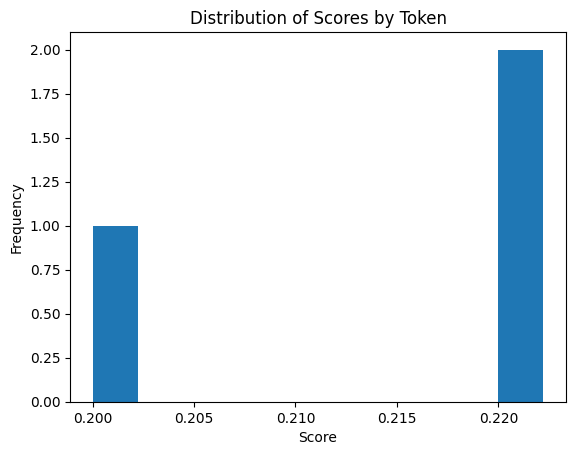

In [131]:
with open("article_html.pkl", "rb") as f:
    html_content = pickle.load(f)

article_text = article_html

nlp = spacy.load("en_core_web_sm")

doc = nlp(article_text)
sentences = [sent.text for sent in doc.sents]

interesting_tokens = ["laser", "headlights", "vehicles"]

plt.hist(scores, bins=10)
plt.title("Distribution of Scores by Token")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


## Question 7
7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

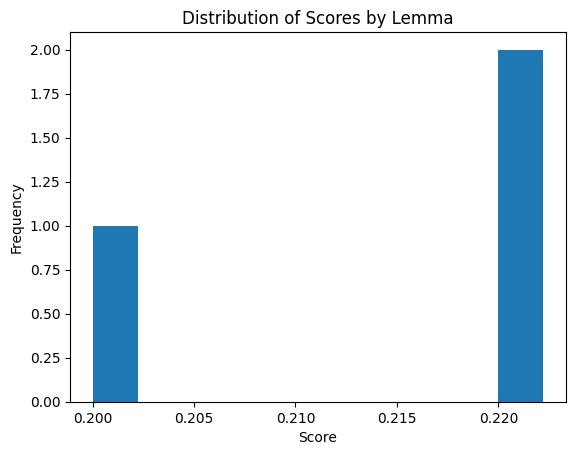

In [132]:
article_text = """
Laser headlights are becoming more common in modern vehicles. 
These headlights use laser diodes to produce light, which is then 
converted into white light using phosphor material. Laser headlights 
are known for their brightness and energy efficiency."""

interesting_lemmas = ["laser", "headlight", "light"]

nlp = spacy.load("en_core_web_sm")

doc = nlp(article_text)
sentences = [sent.text for sent in doc.sents]

scores = []
for sentence in sentences:
    score = score_sentence_by_lemma(sentence, interesting_lemmas)
    scores.append(score)

plt.hist(scores, bins=10)
plt.title("Distribution of Scores by Lemma")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


## Question 8
8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

If we wanted to only consider nouns as interesting words, we would need to exclude non-noun tokens and lemmas (verbs, adjectives, adverbs, etc.) We could change the code by doing the following:

interesting_tokens = [token.text.lower() for token in doc if token.pos_ == "NOUN"]
OR
lemmas = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN"]